# COVID-19 Vaccines Stocks

## 4 Types of Covid-19 Vaccines
### BioNTech SE (BNTX), Johnson & Johnson (JNJ), Moderna, Inc. (MRNA), Pfizer Inc. (PFE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Covid-19 Vaccines
title = "COVID-19"
symbols = ['BNTX', 'JNJ', 'MRNA', 'PFE']
start = '2020-01-01'
end = '2022-09-03'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
2 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

974

In [7]:
df.head()

,BNTX,JNJ,MRNA,PFE
Date,,,,
2020-01-02,37.996727,135.936554,19.230000,33.538971
2020-01-03,39.526466,134.362701,18.889999,33.359020
2020-01-06,43.997250,134.195084,18.129999,33.316177
2020-01-07,42.773460,135.014587,17.780001,33.204781
2020-01-08,44.510452,134.995987,17.980000,33.470413


In [8]:
df.tail()

,BNTX,JNJ,MRNA,PFE
Date,,,,
2022-08-29,144.630005,163.000000,137.259995,46.230000
2022-08-30,147.080002,162.429993,135.929993,45.849998
2022-08-31,144.639999,161.339996,132.270004,45.230000
2022-09-01,147.809998,165.339996,138.949997,46.630001
2022-09-02,147.899994,162.740005,138.570007,45.700001


In [9]:
returns_array = df.to_numpy()

R_mean=np.zeros(4)

returns_array2=np.zeros((674,4))

nan_array= np.isnan(returns_array)    
not_nan_array = ~ nan_array
for index in range(4):
    returns_array2[:,index] = returns_array[not_nan_array[:,index]][:,index]
    
    R_mean[index]=statistics.mean(returns_array2[:,index])
print(R_mean)
#print(df.head(0))
print(returns_array2.shape)

[146.20812401 154.51573653 155.45122391  39.92807158]
(674, 4)


array([[<AxesSubplot:title={'center':'BNTX'}>,
        <AxesSubplot:title={'center':'JNJ'}>],
       [<AxesSubplot:title={'center':'MRNA'}>,
        <AxesSubplot:title={'center':'PFE'}>]], dtype=object)

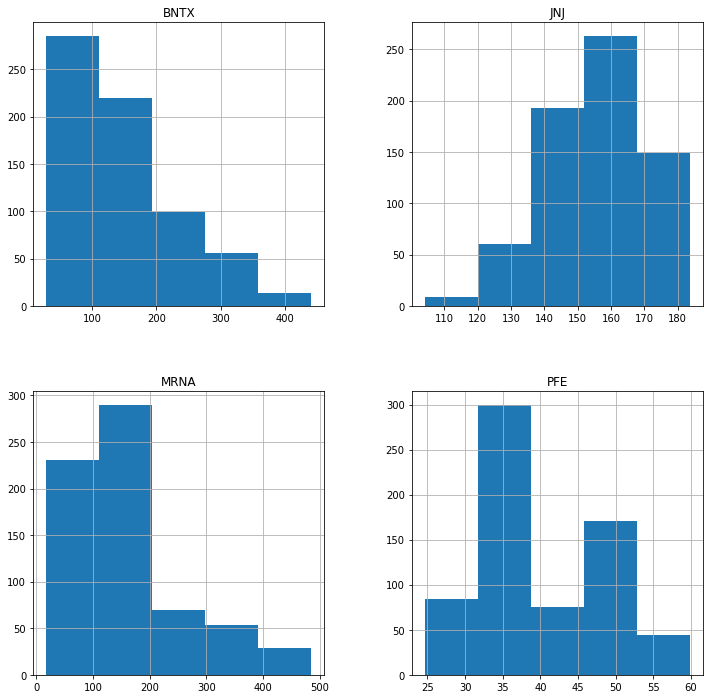

In [10]:
df.hist(bins=5, figsize=(12,12))

[ 7884.97953659   226.59389309 10682.93450488    70.01067681]


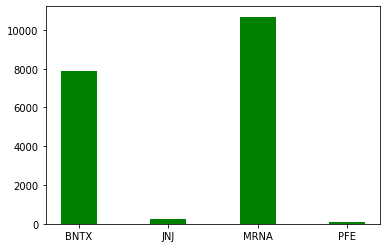

In [11]:
variances=np.zeros(4)
covarances=np.zeros(4)

for j in range(4):
    variances[j]=statistics.variance(returns_array2[:,j])
    covarances=np.cov(returns_array2[:,0],returns_array2[:,0])[0,1]  
covariances_M=np.cov(returns_array2.T)
limit_float = np.round(covariances_M, 3)
#print(returns_array2.T)
print(variances.T)

y=['BNTX', 'JNJ', 'MRNA', 'PFE']

fig = plt.figure()
plt.bar(y,variances.T, color ='green',
        width = 0.4)
plt.show()

In [12]:
# find betas and alfas for 30 combination of the stocks                   
beta=np.zeros((6,6)) # beta is the proportion for stock2
alpha=np.zeros((6,6)) # alpha is the proportion for stock1
print(beta)
for k in range(4):
    for l in range(1,4):
        beta[k,l]=(variances[k]**2-covariances_M[k,l])/(variances[l]**2+variances[k]**2-2*covariances_M[k,l])
        alpha[k,l]=(variances[l]**2-covariances_M[k,l])/(variances[k]**2+variances[l]**2-2*covariances_M[k,l])

print(beta)
print(alpha)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0.00000000e+00 9.99188780e-01 3.52643185e-01 9.99928714e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 4.41435570e-04 9.14442215e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.99558564e-01 5.00000000e-01 9.99961156e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.55577854e-02 3.88438581e-05 5.00000000e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[0.00000000e+00 8.11219768e-04 6.47356815e-01 7.12862426e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 9.99558564e-01 8.55577854e-02
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.41435570e-04 5.00000000e-01 3.88438581e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 

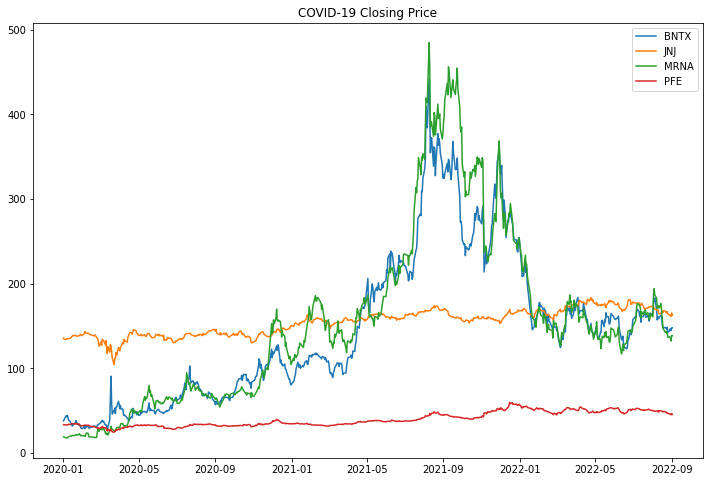

In [13]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [14]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

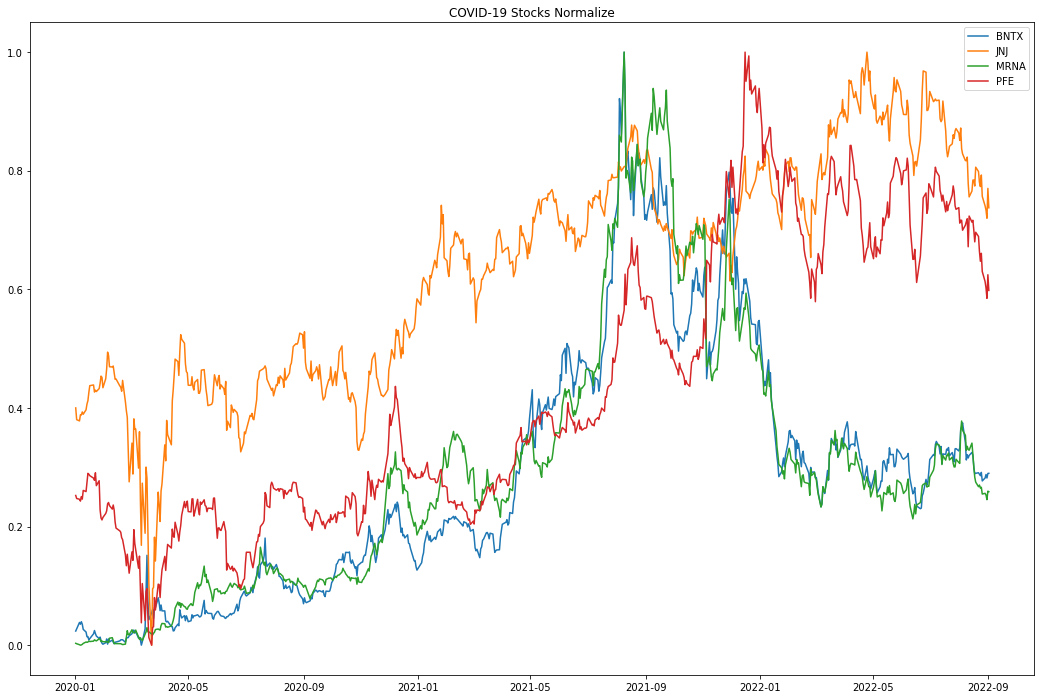

In [15]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [16]:
stock_rets = df.pct_change().dropna()

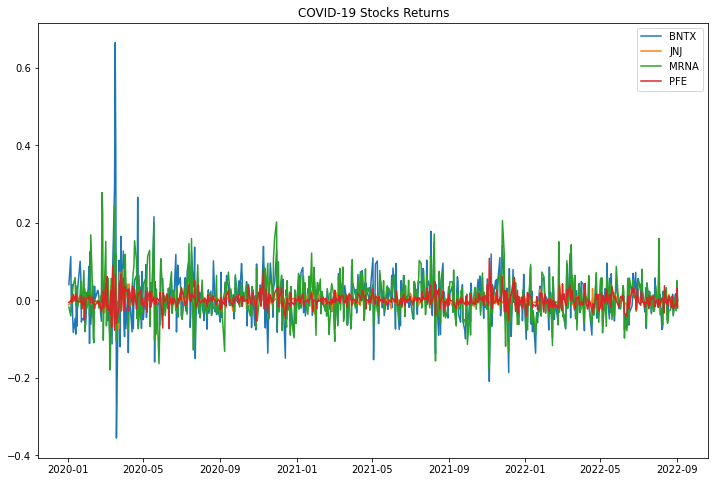

In [17]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

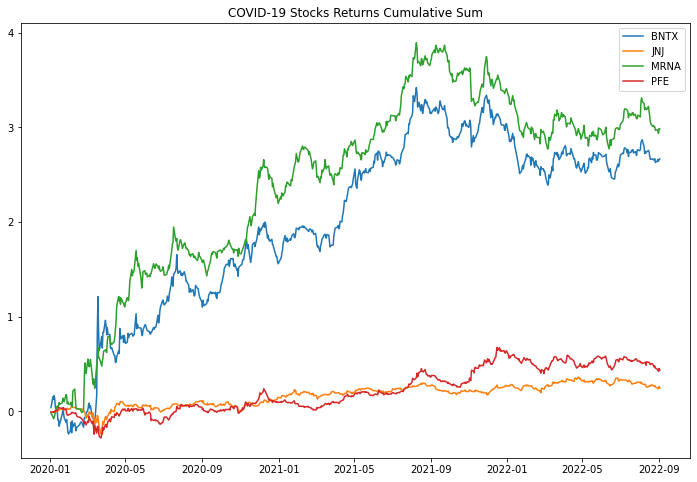

In [18]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

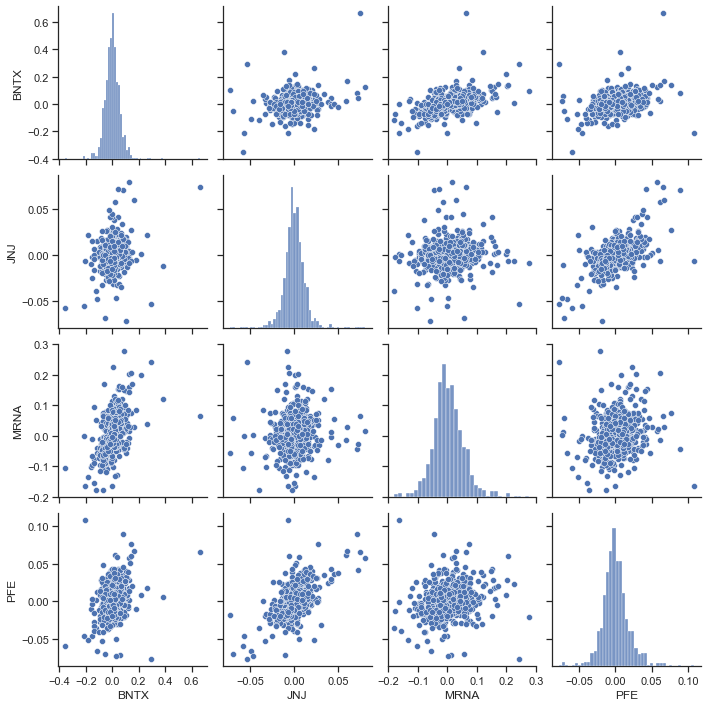

In [19]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

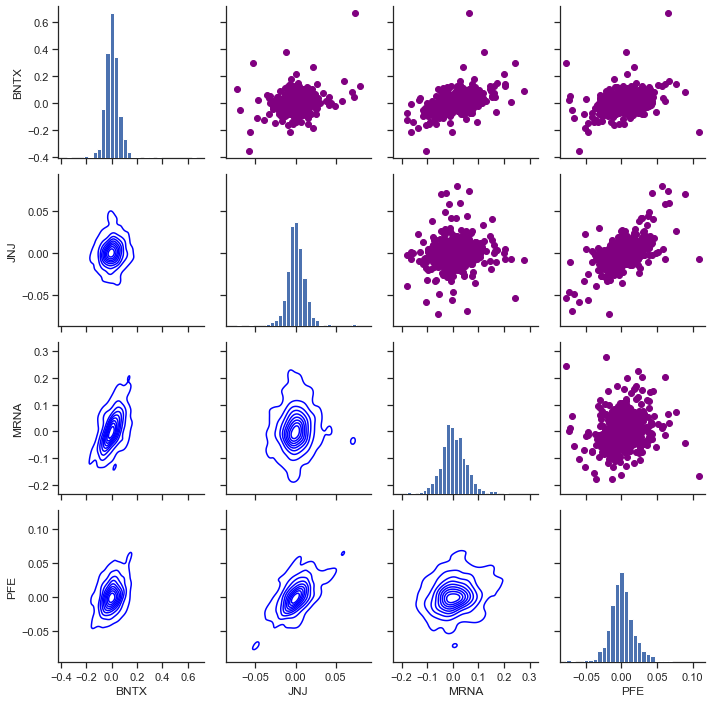

In [20]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

<AxesSubplot:>

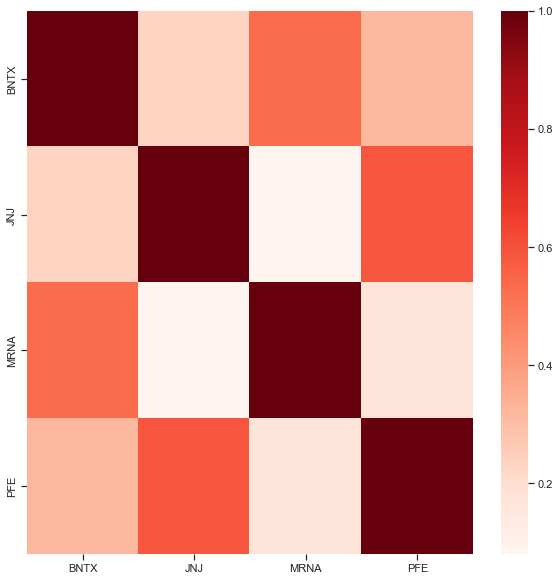

In [21]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

<AxesSubplot:>

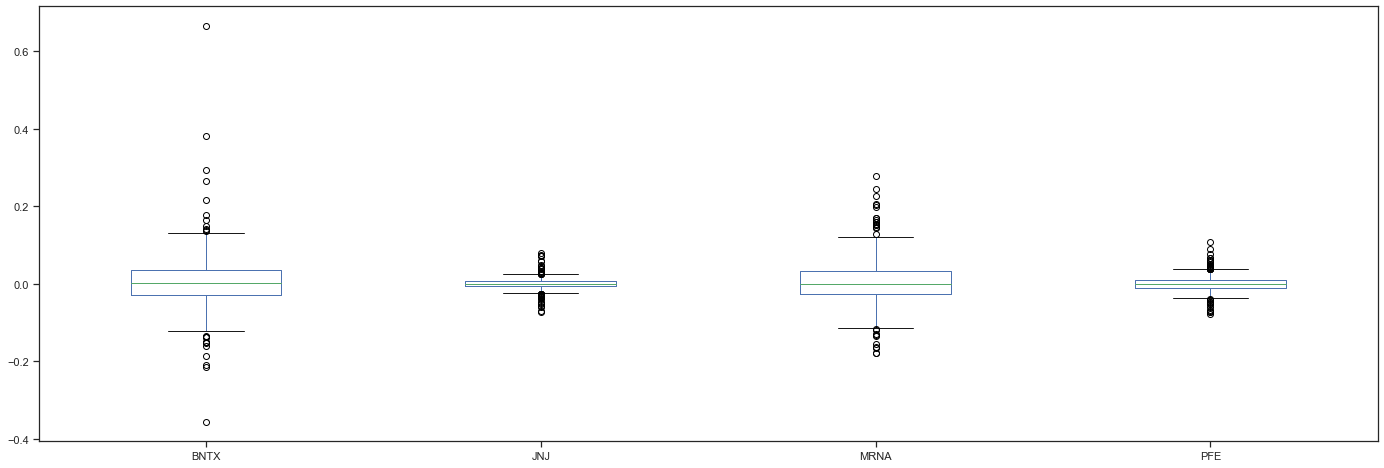

In [22]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

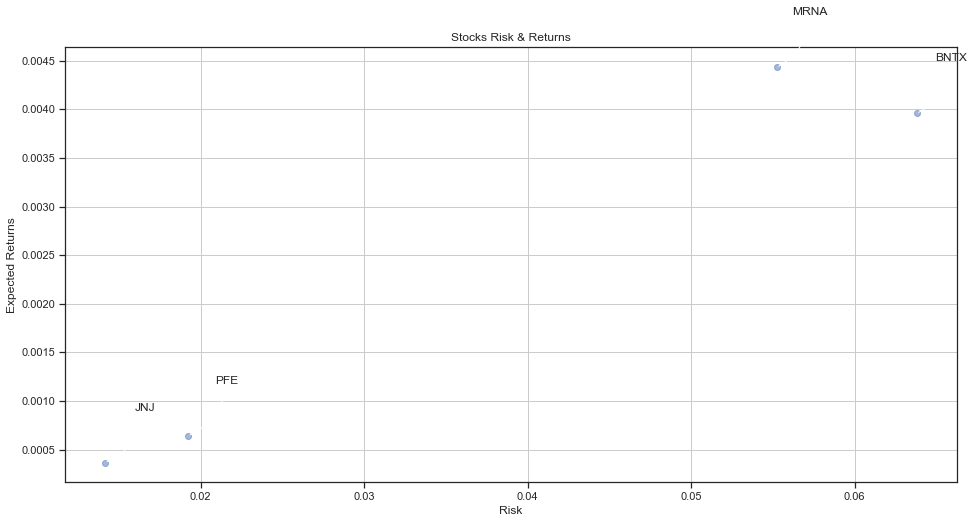

In [23]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

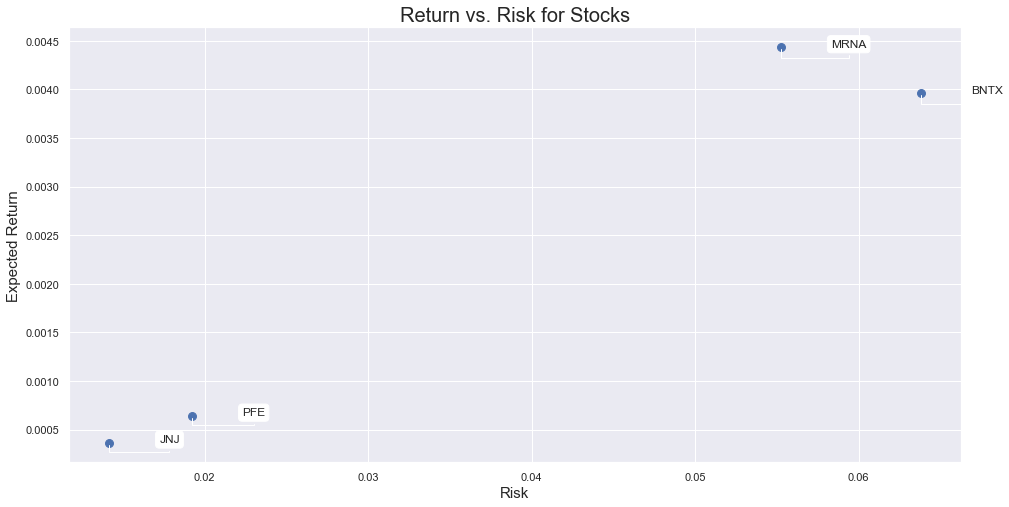

In [24]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [25]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [26]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

,Return,Risk
BNTX,0.997714,1.012772
JNJ,0.092552,0.224831
MRNA,1.117387,0.877046
PFE,0.162228,0.305414


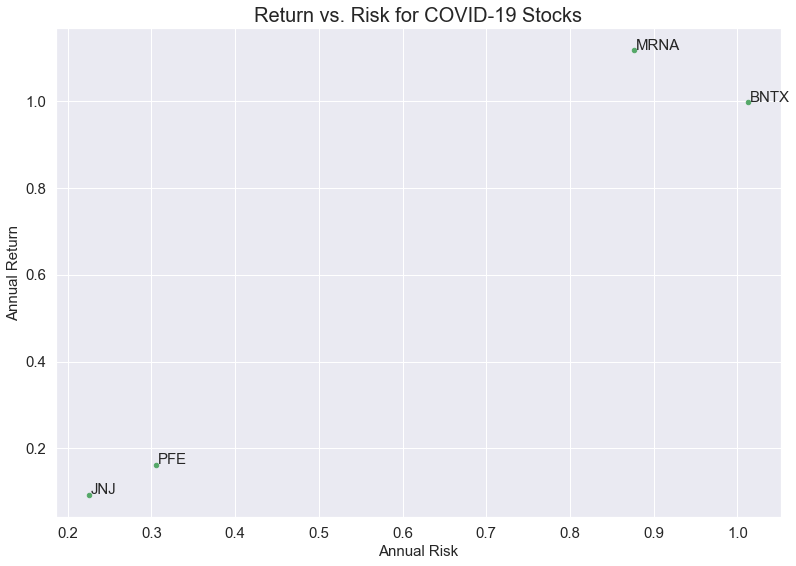

In [27]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [28]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

PFE   PFE     1.000000
MRNA  MRNA    1.000000
JNJ   JNJ     1.000000
BNTX  BNTX    1.000000
PFE   JNJ     0.588306
JNJ   PFE     0.588306
MRNA  BNTX    0.533652
BNTX  MRNA    0.533652
PFE   BNTX    0.319751
BNTX  PFE     0.319751
JNJ   BNTX    0.234317
BNTX  JNJ     0.234317
PFE   MRNA    0.169038
MRNA  PFE     0.169038
      JNJ     0.080143
JNJ   MRNA    0.080143
dtype: float64

In [29]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,BNTX,JNJ,MRNA,PFE
Date,,,,
2020-01-03,0.387771,0.401448,0.353860,0.387207
2020-01-06,0.459161,0.468984,0.304595,0.409160
2020-01-07,0.321059,0.517063,0.350312,0.398082
2020-01-08,0.388113,0.476239,0.417055,0.459102
2020-01-09,0.308553,0.496531,0.443511,0.392657


In [30]:
Normalized_Value.corr()

,BNTX,JNJ,MRNA,PFE
BNTX,1.000000,0.234317,0.533652,0.319751
JNJ,0.234317,1.000000,0.080143,0.588306
MRNA,0.533652,0.080143,1.000000,0.169038
PFE,0.319751,0.588306,0.169038,1.000000


In [31]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

PFE   PFE     1.000000
MRNA  MRNA    1.000000
JNJ   JNJ     1.000000
BNTX  BNTX    1.000000
PFE   JNJ     0.588306
JNJ   PFE     0.588306
MRNA  BNTX    0.533652
BNTX  MRNA    0.533652
PFE   BNTX    0.319751
BNTX  PFE     0.319751
JNJ   BNTX    0.234317
BNTX  JNJ     0.234317
PFE   MRNA    0.169038
MRNA  PFE     0.169038
      JNJ     0.080143
JNJ   MRNA    0.080143
dtype: float64

In [32]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
BNTX    0.003959
JNJ     0.000367
MRNA    0.004434
PFE     0.000644
dtype: float64
--------------------------------------------------
Stock risks:
BNTX    0.063799
JNJ     0.014163
MRNA    0.055249
PFE     0.019239
dtype: float64


In [33]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
JNJ,0.000367,0.014163
PFE,0.000644,0.019239
BNTX,0.003959,0.063799
MRNA,0.004434,0.055249


In [34]:
table.sort_values(by='Risk')

,Returns,Risk
JNJ,0.000367,0.014163
PFE,0.000644,0.019239
MRNA,0.004434,0.055249
BNTX,0.003959,0.063799


In [35]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
BNTX,0.003959,0.063799,-0.094686
JNJ,0.000367,0.014163,-0.680131
MRNA,0.004434,0.055249,-0.100743
PFE,0.000644,0.019239,-0.486310


In [36]:
table['Max Returns'] = rets.max()

In [37]:
table['Min Returns'] = rets.min()

In [38]:
table['Median Returns'] = rets.median()

In [39]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
BNTX,0.003959,0.063799,-0.094686,0.665000,-0.355435,0.001770,0.060887
JNJ,0.000367,0.014163,-0.680131,0.079977,-0.072984,0.000000,-1.572512
MRNA,0.004434,0.055249,-0.100743,0.278107,-0.179669,-0.000540,-0.273472
PFE,0.000644,0.019239,-0.486310,0.108552,-0.077346,-0.000548,-1.994425


In [40]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
BNTX,0.003959,0.063799,-0.094686,0.665000,-0.355435,0.001770,0.060887,6.249281e-07
JNJ,0.000367,0.014163,-0.680131,0.079977,-0.072984,0.000000,-1.572512,-1.627304e-05
MRNA,0.004434,0.055249,-0.100743,0.278107,-0.179669,-0.000540,-0.273472,-2.811565e-06
PFE,0.000644,0.019239,-0.486310,0.108552,-0.077346,-0.000548,-1.994425,-2.068338e-05


In [41]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BNTX,0.003959,0.063799,-0.094686,0.665000,-0.355435,0.001770,0.060887,6.249281e-07,0.421367
JNJ,0.000367,0.014163,-0.680131,0.079977,-0.072984,0.000000,-1.572512,-1.627304e-05,0.047663
MRNA,0.004434,0.055249,-0.100743,0.278107,-0.179669,-0.000540,-0.273472,-2.811565e-06,0.666892
PFE,0.000644,0.019239,-0.486310,0.108552,-0.077346,-0.000548,-1.994425,-2.068338e-05,0.083339


In [42]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
PFE,0.000644,0.019239,-0.486310,0.108552,-0.077346,-0.000548,-1.994425,-2.068338e-05,0.083339
JNJ,0.000367,0.014163,-0.680131,0.079977,-0.072984,0.000000,-1.572512,-1.627304e-05,0.047663
MRNA,0.004434,0.055249,-0.100743,0.278107,-0.179669,-0.000540,-0.273472,-2.811565e-06,0.666892
BNTX,0.003959,0.063799,-0.094686,0.665000,-0.355435,0.001770,0.060887,6.249281e-07,0.421367
